In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

# Part 2 - Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

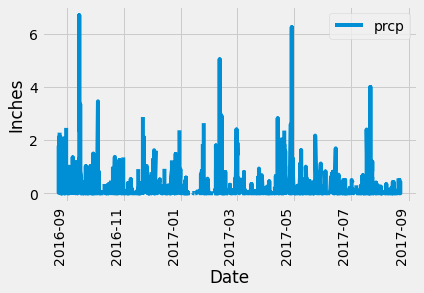

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
query = f'''
    SELECT
        date,
        prcp
    FROM
        measurement
    WHERE
        date >= (SELECT DATE(MAX(date),'-1 year') FROM measurement)
'''
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.read_sql(query, conn)
prcp_df['date'] = pd.to_datetime(prcp_df['date'])

# Sort the dataframe by date
prcp_df.sort_values('date')
prcp_df = prcp_df.set_index('date')
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
query = '''
    SELECT COUNT(*) as station_count FROM station
'''

station_df = pd.read_sql(query, conn)

station_count = station_df['station_count'].values[0]

print(f"There are {station_count} stations in the database")

There are 9 stations in the database


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

query = '''
    SELECT
        s.station AS station_code,
        s.name AS station_name,
        COUNT(*) as station_count
    FROM
        measurement m
        INNER JOIN station s
        ON m.station = s.station
    GROUP BY 
        s.station,
        s.name
    ORDER BY
        station_count DESC
'''

active_stations = pd.read_sql(query, conn)
active_stations.head()

,station_code,station_name,station_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_stations.sort_values('station_count', ascending = False, inplace = True)
most_active_station = active_stations['station_code'].values[0]

query = f'''
    SELECT
        MIN(tobs) AS min_tobs,
        MAX(tobs) AS max_tobs,
        AVG(tobs) AS avg_tobs
    FROM
        measurement
    WHERE
        station = '{most_active_station}'
'''
temp_obs_df = pd.read_sql(query, conn)
temp_obs_df.head()

,min_tobs,max_tobs,avg_tobs
0,54.0,85.0,71.663781


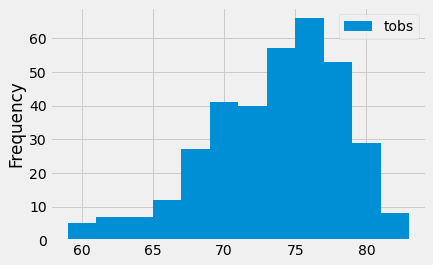

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = f'''
    SELECT
        date,
        tobs
    FROM
        measurement
    WHERE
        date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
        AND station = '{most_active_station}'
'''
high_temp_obs_df = pd.read_sql(query, conn)
high_temp_obs_df.head()

high_temp_obs_df.plot.hist(bins = 12)